## TITLE: Car Insurance Claims Prediction

### Problem Statement 
The insurance claim is a basic problem in insurance companies. Insurance insurers always have a challenge to the growing of insurance claim loss. Because there is the occurrence of claim fraud and the volume of claim data increases in the insurance companies. As a result, it is difficult to classify the insured claim status during the claim review process. Therefore, the aims of the study was to build a machine learning model that classifies and make insurance claim status prediction in machine learning approach.


### Aim
To build a solution that should be able to predict if a Car Insurance Claim was made or not according to the provided dataset.


### Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. We will try out different machine learning algorithms that’s best fit for the above case.


### Content
The columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company.



### Features
Input/Features
1. ID
2. AGE
3. GENDER
4. RACE
5. DRIVING_EXPERIENCE
6. EDUCATION
7. INCOME
8. CREDIT_SCORE
9. VEHICLE_OWNERSHIP
10. VEHICLE_YEAR
11. MARRIED
12. CHILDREN
13. POSTAL_CODE
14. ANNUAL_MILEAGE
15. VEHICLE_TYPE
16. SPEEDING_VIOLATIONS
17. DUIS
18. PAST_ACCIDENTS

Output/Labels

19. OUTCOME

### Procedure
1. Importing and checking the dataset

2. EDA

3. Feature Engineering

4. Preprocessing

5. Label Encoding 

6. One Hot Encoding 

7. Train Test Split

8. Model Building

9. Evaluation

10. Conclusion

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics
pd.options.display.max_columns = None

In [2]:
# Since the data is in excel file we use pandas read_csv to load the data 
df = pd.read_csv('C:/Users/Usama Shaikh/Downloads/Capstone Car Insurance/Car_Insurance_Claim.csv')

In [3]:
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [4]:
# Vizualizing first five rows of data
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
# Vizualizing last five rows of data
df.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


### EDA(Exploratory Data Analysis)

In [6]:
# Checking the Dimensions of dataset
df.shape

(10000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [8]:
# Checking the summary stats of the data
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [9]:
df.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


### Observations:
1. There are a total of 10000 rows in the Data.
2. AGE column has 4 unique categories.
3. Most of the customer are having INCOME of upper class.
4. Most of the customer have driving experience of 0-9 years.
5. Most of the customers have sedan in Vehicle_Type.

In [10]:
#Checking Missing values
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

### Observations:
1. There are null values in two columns and both attributes are of numerical type
2. There are 982 null values in the CREDIT_SCORE column
3. There are 957 null values in the ANNUAL_MILEAGE  column 

 We will replace the nan values with median as median is not affected by outliers.

In [11]:
#Imputation of Null values
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median(), inplace=True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median(), inplace=True)

In [12]:
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Now data do not have any null values

To simplify our data and save some memory, I'm going to drop the ID column because it doesn't represent any relevant information.

In [13]:
# Dropping ID column
df.drop(['ID'], axis=1, inplace=True)

In [14]:
df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [15]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [16]:
df['OUTCOME']= df['OUTCOME'].map(lambda x: 1 if x==1.0 else 0)

In [17]:
df['OUTCOME'].value_counts()

0    6867
1    3133
Name: OUTCOME, dtype: int64

In [18]:
df['OUTCOME'] = df['OUTCOME'].astype('int')

In [19]:
df['OUTCOME'].dtype

dtype('int32')

<AxesSubplot:title={'center':'Outcome Count'}, xlabel='OUTCOME', ylabel='count'>

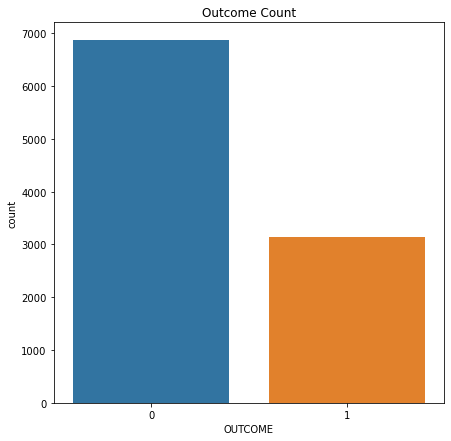

In [20]:
# count plot to check the OUTCOME-distribution
plt.figure(figsize=(7,7))
plt.title('Outcome Count')
sns.countplot(data=df, x ='OUTCOME')

### Observations:
1. We can see that the outcome/target variable is imbalanced.
2. The dataset is skewed towards Class 0.

In [21]:
# Pulling out names of Numerical variables by conditioning dtypes not equal to object type
nc = df.select_dtypes(exclude='object').columns.values
print("Number of Numerical features: ", len(nc))
print(nc)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
fc = df.select_dtypes(include='object').columns.values
print("Number of Categorical features: ", len(fc))
print(fc)

Number of Numerical features:  10
['CREDIT_SCORE' 'VEHICLE_OWNERSHIP' 'MARRIED' 'CHILDREN' 'POSTAL_CODE'
 'ANNUAL_MILEAGE' 'SPEEDING_VIOLATIONS' 'DUIS' 'PAST_ACCIDENTS' 'OUTCOME']
Number of Categorical features:  8
['AGE' 'GENDER' 'RACE' 'DRIVING_EXPERIENCE' 'EDUCATION' 'INCOME'
 'VEHICLE_YEAR' 'VEHICLE_TYPE']


In [22]:
# Checking unique values for Numerical features
for col in nc:
    print('column:','\n',col, '\n', df[col].unique(),'\n')

column: 
 CREDIT_SCORE 
 [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478] 

column: 
 VEHICLE_OWNERSHIP 
 [1. 0.] 

column: 
 MARRIED 
 [0. 1.] 

column: 
 CHILDREN 
 [1. 0.] 

column: 
 POSTAL_CODE 
 [10238 32765 92101 21217] 

column: 
 ANNUAL_MILEAGE 
 [12000. 16000. 11000. 13000. 14000. 10000.  8000. 18000. 17000.  7000.
 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000. 21000.
 22000.] 

column: 
 SPEEDING_VIOLATIONS 
 [ 0  2  3  7  6  4 10 13  1  5  9  8 12 11 15 17 19 18 16 14 22] 

column: 
 DUIS 
 [0 2 1 3 4 5 6] 

column: 
 PAST_ACCIDENTS 
 [ 0  1  3  7  2  5  4  6  8 10 11  9 12 14 15] 

column: 
 OUTCOME 
 [0 1] 



In [23]:
## Checking unique values for categorical features
for col in fc:
    print('column:','\n',col, '\n', df[col].unique(),'\n')

column: 
 AGE 
 ['65+' '16-25' '26-39' '40-64'] 

column: 
 GENDER 
 ['female' 'male'] 

column: 
 RACE 
 ['majority' 'minority'] 

column: 
 DRIVING_EXPERIENCE 
 ['0-9y' '10-19y' '20-29y' '30y+'] 

column: 
 EDUCATION 
 ['high school' 'none' 'university'] 

column: 
 INCOME 
 ['upper class' 'poverty' 'working class' 'middle class'] 

column: 
 VEHICLE_YEAR 
 ['after 2015' 'before 2015'] 

column: 
 VEHICLE_TYPE 
 ['sedan' 'sports car'] 



In [24]:
df['EDUCATION'].replace('none',np.nan, inplace=True)

In [25]:
df['EDUCATION'].value_counts()

high school    4157
university     3928
Name: EDUCATION, dtype: int64

In [26]:
df.isnull().sum()

AGE                       0
GENDER                    0
RACE                      0
DRIVING_EXPERIENCE        0
EDUCATION              1915
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP         0
VEHICLE_YEAR              0
MARRIED                   0
CHILDREN                  0
POSTAL_CODE               0
ANNUAL_MILEAGE            0
VEHICLE_TYPE              0
SPEEDING_VIOLATIONS       0
DUIS                      0
PAST_ACCIDENTS            0
OUTCOME                   0
dtype: int64

In [27]:
#replacing nan values with mode
df['EDUCATION'].replace(np.nan, 'high school',inplace=True)

In [28]:
df['EDUCATION'].isnull().sum()

0

In [29]:
# Data Cleaning
df['AGE'].replace({'16-25': 'Young', '26-39': 'Middle Age', '40-64': 'Old', '65+': 'Very Old'}, inplace=True)

df['DRIVING_EXPERIENCE'].replace({'0-9y': 'Newbie', '10-19y': 'Amateur', '20-29y': 'Advanced', '30y+': 'Expert'}, inplace=True)

In [30]:
df['AGE'].unique()

array(['Very Old', 'Young', 'Middle Age', 'Old'], dtype=object)

In [31]:
df['DRIVING_EXPERIENCE'].unique()

array(['Newbie', 'Amateur', 'Advanced', 'Expert'], dtype=object)

### Visualizing Categorical Variables

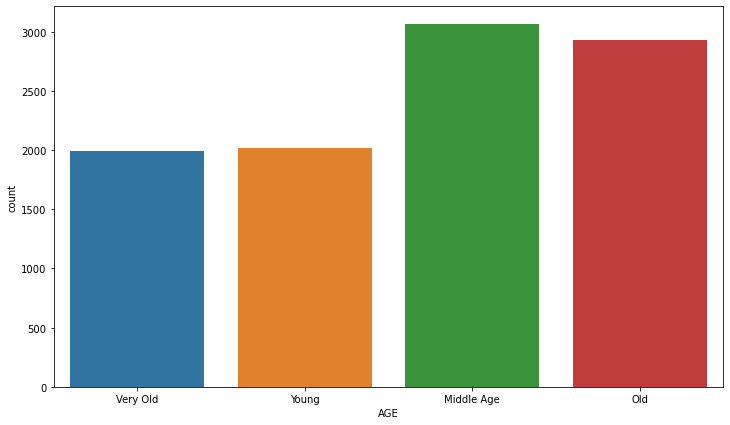

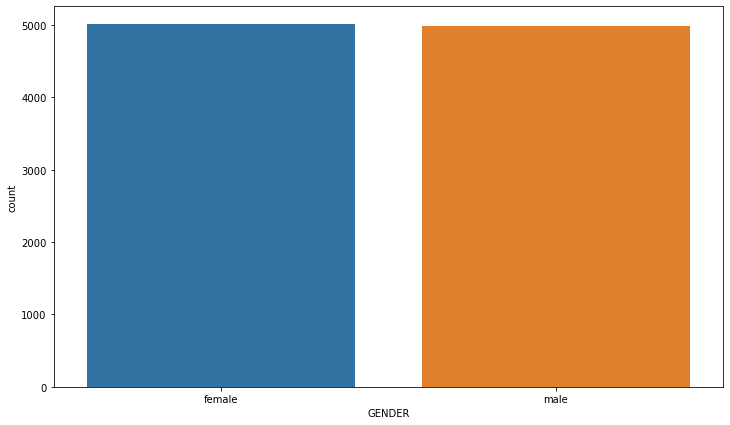

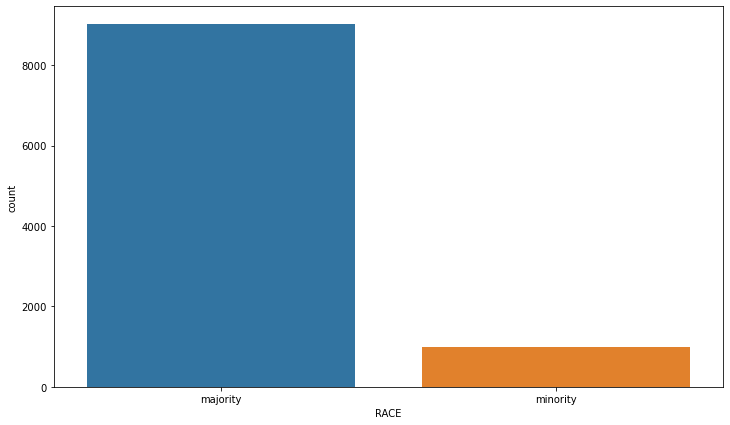

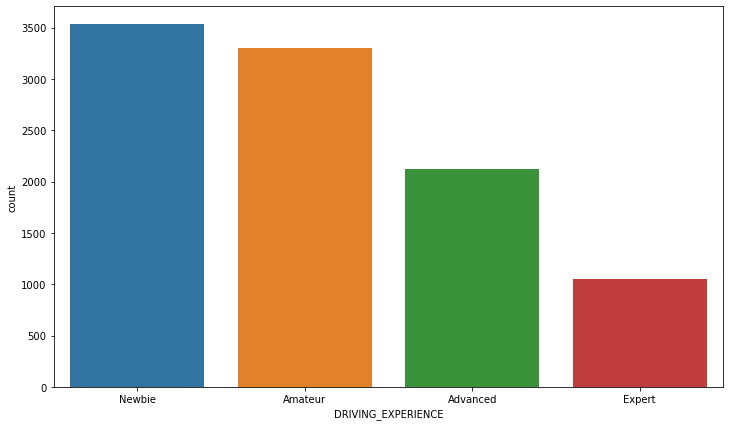

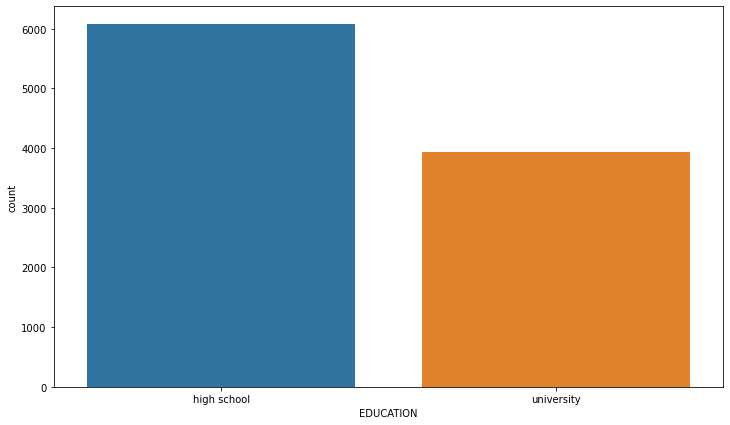

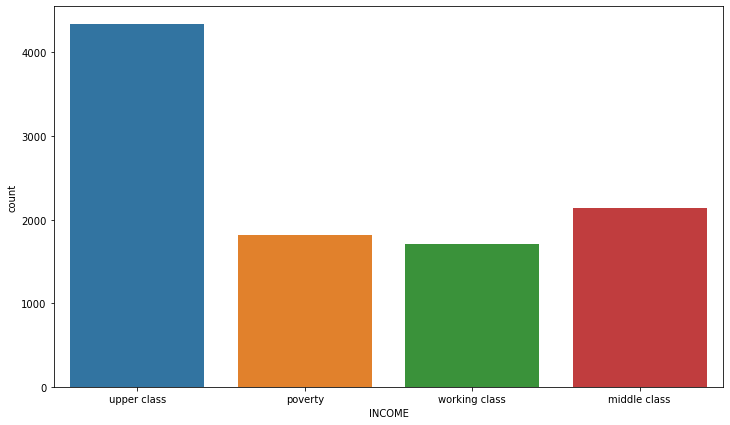

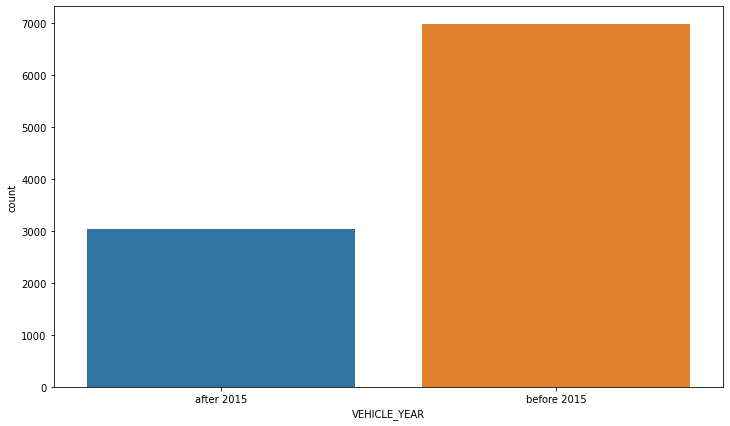

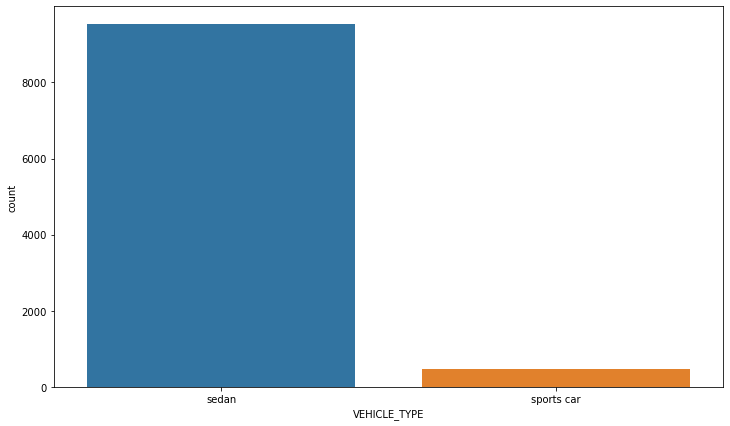

In [32]:
# Let's visualize all categorical columns at once
for i in fc:
    plt.figure(figsize=(12,7))
    sns.countplot(x=df[i])

### Observations:
1. AGE : In Age column there are 4 different categories out of which the customers from age 26-39 are having the highest count.
2. GENDER : In Gender column the count of male and female customers are nearly 50% each.
3. RACE : In Race most of the customers are from Majority class.
4. DRIVING_EXPERIENCE : In Driving Experience there are 4 different categories out of which customers from 0-9y have the maximum count.
5. EDUCATION : In Education column there are 3 categories out of which high school have the maximum count.
6. INCOME : In Income column there are 4 different categories out of which upper class have the maximum count.
7. VEHICLE_YEAR : In Vehicle Year column there are 2 categories, vehicle purchased before 2015 and after 2015 out of which vehicle purchased before 2015 have almost 70% of count.
8. VEHICLE_TYPE : In Vehicle type there are 2 types of vehicles sedan and sports car out of which sedan has almost 90% of count.

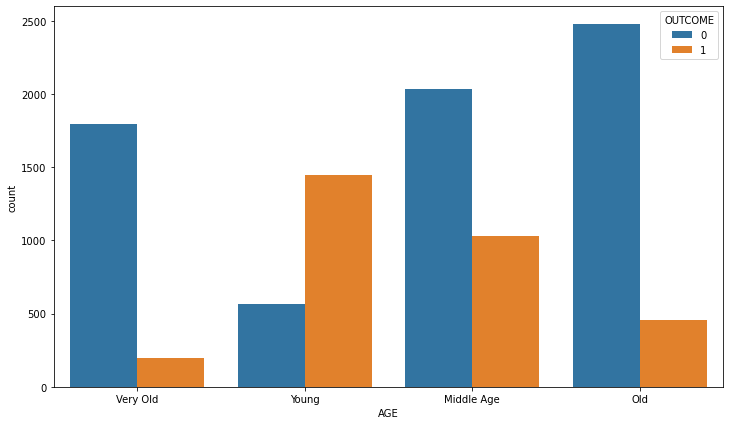

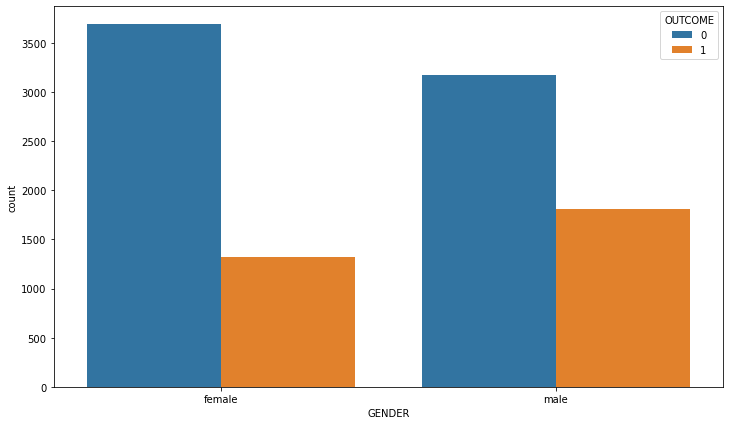

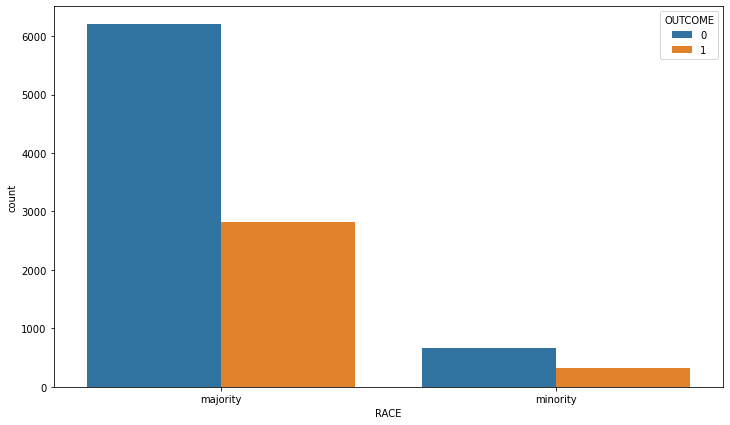

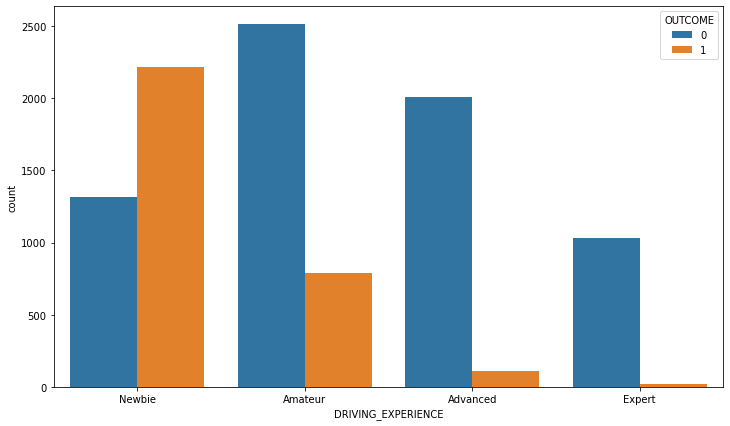

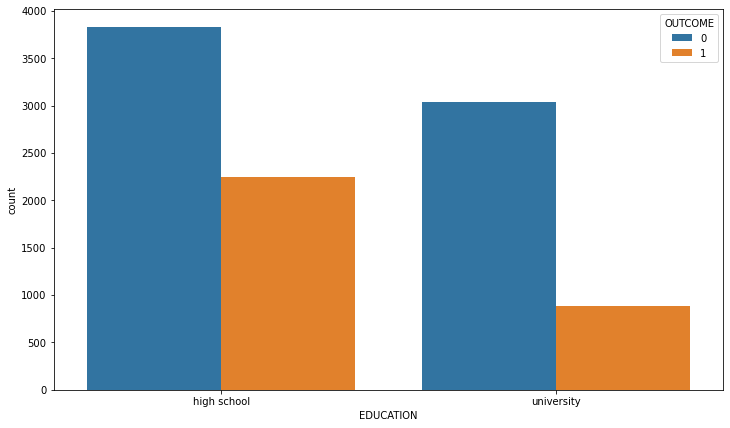

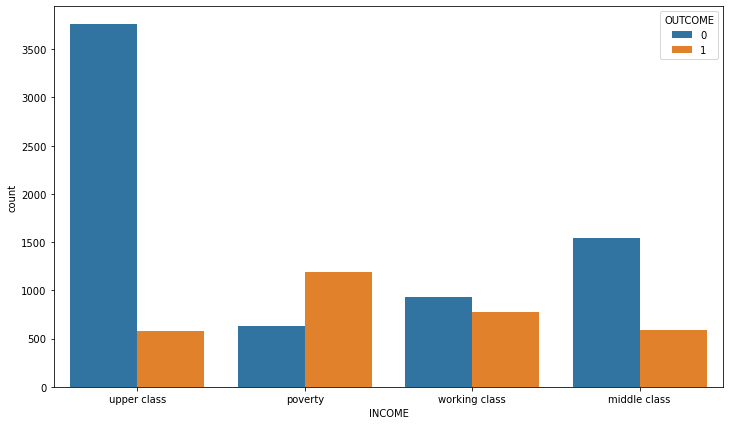

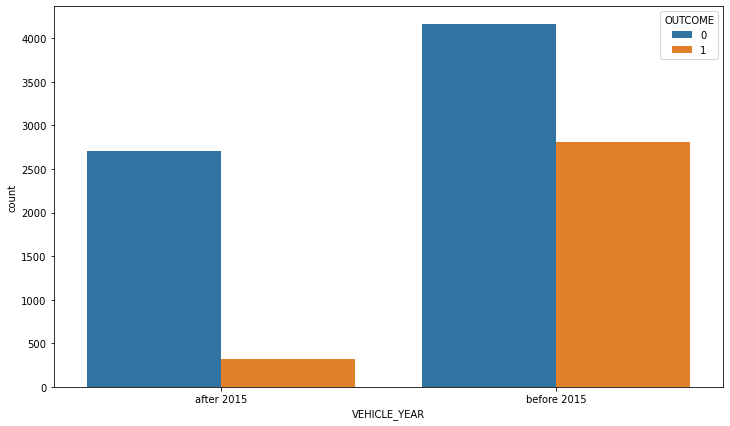

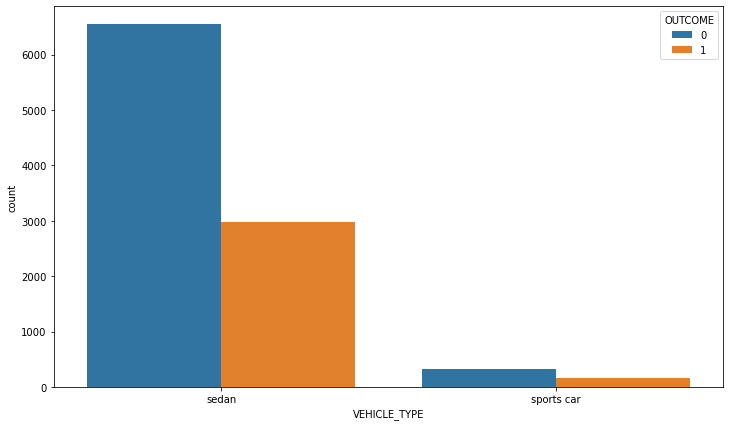

In [33]:
# Let's visualize all categorical columns at once
for i in fc:
    plt.figure(figsize=(12,7))
    sns.countplot(data= df,x=df[i], hue='OUTCOME')

### Observations:
1. In Age column Young and Middle Age customers claims more Insurance than customers of Old and Very Old Age.
2. Male customers claims more Insurance than Female customers.
3. In Race Majority of customers do not claim Insurance whereas there are very few customers who are having Minority Race.
4. People who are in Newbie category claims more Insurances as compared to others.
5. High School customers claims more Insurance than University customers.
6. Customers with Poverty class in Income claims more Insurance than any other class.
7. Customers who have purchased Car before 2015 claims more Insurance than customers who have purchased the car after 2015.
8. Customers having Sedan car type claims more Insurance than customers who are having sports car. 

### Checking for Singularity

In [34]:
### Checking Singularity
for col in fc:
    print(df[col].value_counts()/df.shape[0],'\n')

Middle Age    0.3063
Old           0.2931
Young         0.2016
Very Old      0.1990
Name: AGE, dtype: float64 

female    0.501
male      0.499
Name: GENDER, dtype: float64 

majority    0.9012
minority    0.0988
Name: RACE, dtype: float64 

Newbie      0.3530
Amateur     0.3299
Advanced    0.2119
Expert      0.1052
Name: DRIVING_EXPERIENCE, dtype: float64 

high school    0.6072
university     0.3928
Name: EDUCATION, dtype: float64 

upper class      0.4336
middle class     0.2138
poverty          0.1814
working class    0.1712
Name: INCOME, dtype: float64 

before 2015    0.6967
after 2015     0.3033
Name: VEHICLE_YEAR, dtype: float64 

sedan         0.9523
sports car    0.0477
Name: VEHICLE_TYPE, dtype: float64 



As we can see that the RACE and VEHICLE_TYPE columns are having singularity. Therefore dropping those 2 columns.

In [35]:
df.drop(['RACE','VEHICLE_TYPE'], axis=1, inplace=True)

In [36]:
df.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

### Visualizing Numerical Variables

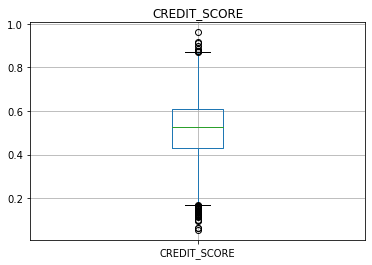

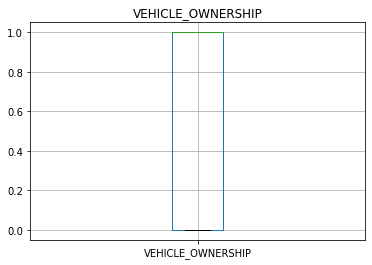

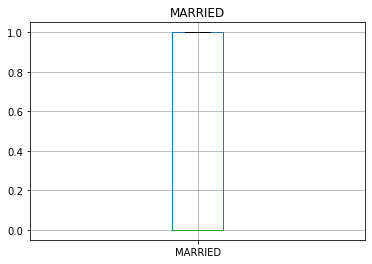

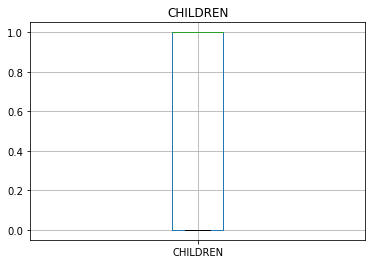

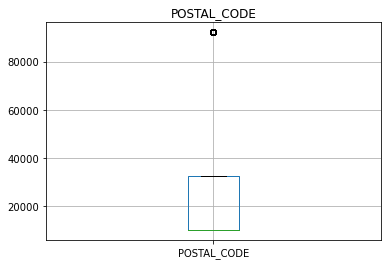

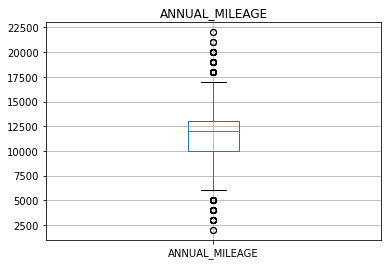

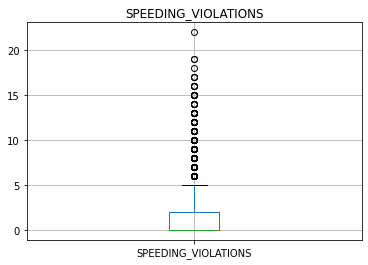

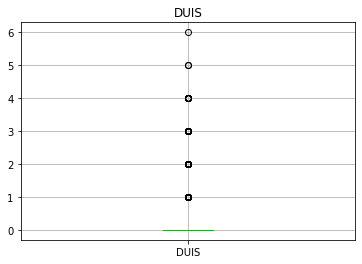

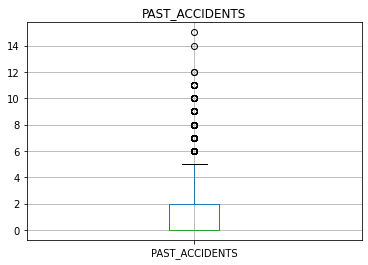

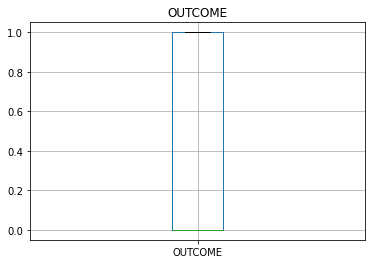

In [37]:
# Boxplot to visualize the outliers
for i in nc:
    plt.figure()
    df.boxplot([i])
    plt.title(i)

In [38]:
# Now using Z-score method to check and remove outliers
from scipy import stats
z = np.abs(stats.zscore(df[nc]))
print(z)
threshold = 3
print(np.where(z > 3))

[[0.85879984 0.65933317 0.99640646 ... 0.43102013 0.63926317 0.67545539]
 [1.21553599 1.51668389 0.99640646 ... 0.43102013 0.63926317 1.48048266]
 [0.18025247 0.65933317 0.99640646 ... 0.43102013 0.63926317 0.67545539]
 ...
 [0.35005282 0.65933317 0.99640646 ... 0.43102013 0.63926317 0.67545539]
 [1.16638521 1.51668389 0.99640646 ... 0.43102013 0.03407225 1.48048266]
 [0.62316003 0.65933317 1.0036065  ... 0.43102013 0.63926317 0.67545539]]
(array([  10,   10,   14, ..., 9969, 9976, 9989], dtype=int64), array([7, 8, 7, ..., 7, 7, 6], dtype=int64))


In [39]:
# remove the outliers and check the shape of data
data = df[(z < 3).all(axis=1)]
data.shape

(8817, 16)

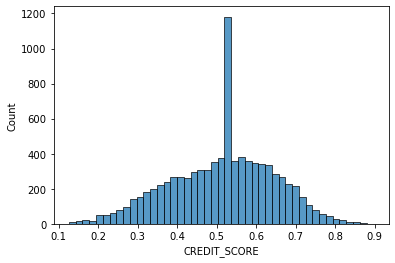

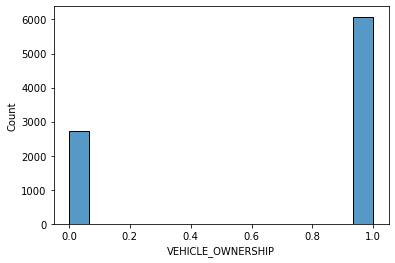

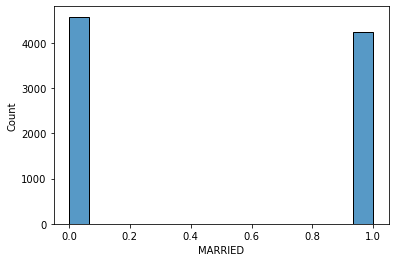

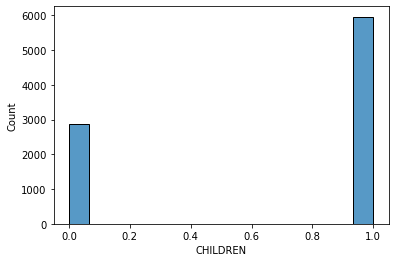

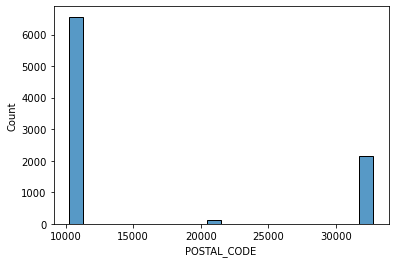

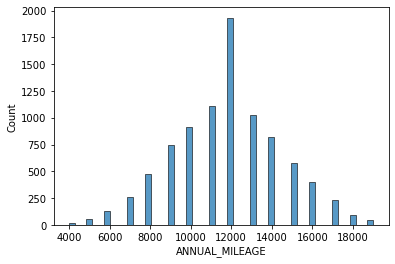

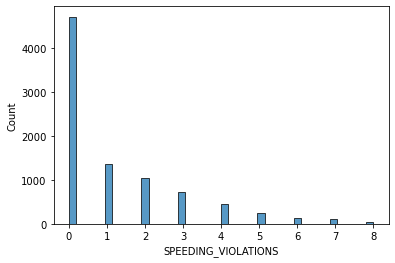

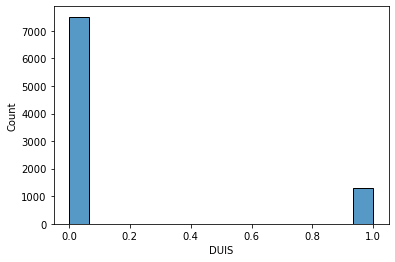

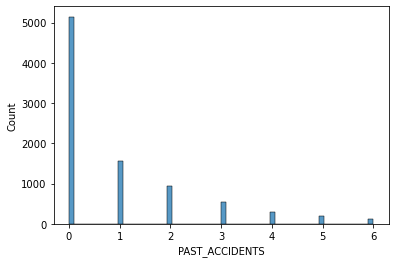

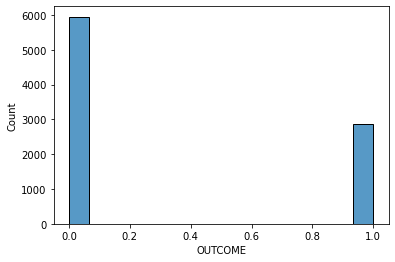

In [40]:
# Histogram for checking distribution of numerical features
for col in nc:
    plt.figure()
    sns.histplot(data[col])
plt.show()

<AxesSubplot:>

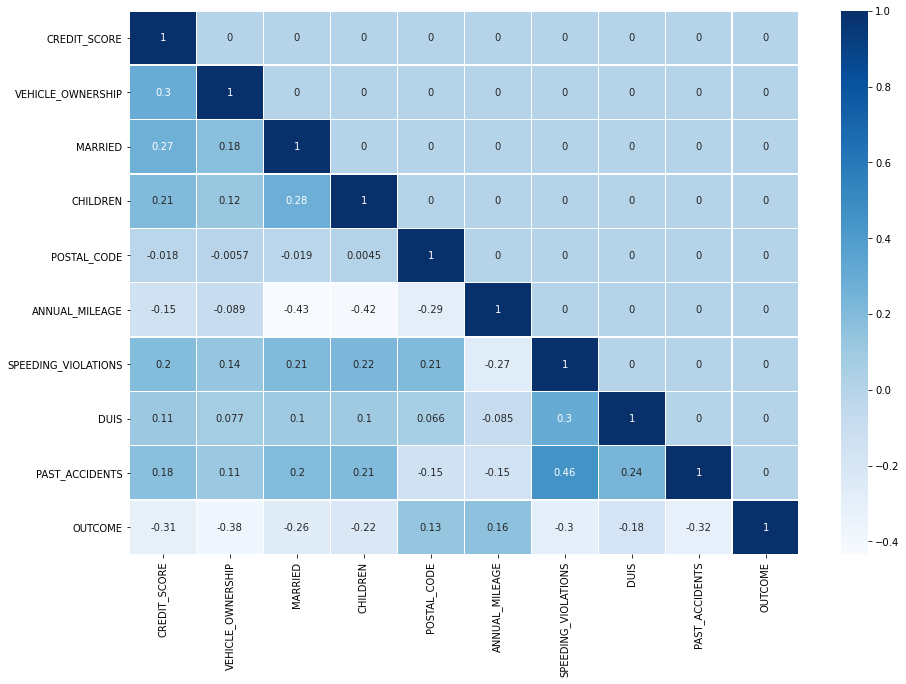

In [41]:
# Plot heatmap to visualize the correlation of variables 
fig,ax = plt.subplots(figsize=(15,10))
cor = data[nc].corr()
cor = np.tril(cor)
sns.heatmap(cor, xticklabels = data[nc].columns, yticklabels = data[nc].columns,cbar=True,cmap='Blues',annot=True,linewidths=.5, ax=ax)

### From the above heatmap we can see that none of the features are highly correlated.

In [42]:
data.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [43]:
fc = df.select_dtypes(include='object').columns.values
dummies = pd.get_dummies(data[fc])
dummies

,AGE_Middle Age,AGE_Old,AGE_Very Old,AGE_Young,GENDER_female,GENDER_male,DRIVING_EXPERIENCE_Advanced,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_high school,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015
0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1
2,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1
3,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
9996,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
9997,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1
9998,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1


In [44]:
df_final = pd.concat([data[nc], dummies], axis=1)

In [45]:
df_final.columns

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'AGE_Middle Age', 'AGE_Old',
       'AGE_Very Old', 'AGE_Young', 'GENDER_female', 'GENDER_male',
       'DRIVING_EXPERIENCE_Advanced', 'DRIVING_EXPERIENCE_Amateur',
       'DRIVING_EXPERIENCE_Expert', 'DRIVING_EXPERIENCE_Newbie',
       'EDUCATION_high school', 'EDUCATION_university', 'INCOME_middle class',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_YEAR_after 2015', 'VEHICLE_YEAR_before 2015'],
      dtype='object')

###  Train and Test Split

In [46]:
X = df_final.drop(['OUTCOME'], axis=1)
y = df_final['OUTCOME']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [48]:
X_train.shape

(6171, 27)

In [49]:
X_test.shape

(2646, 27)

In [50]:
y_train.shape

(6171,)

### Using (Synthetic Minority Oversampling Technique) SMOTE for handling Unbalanced Data

In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [52]:
counter = Counter(y_train)
counter1 = Counter(y_test)
print('Before',counter)
print('Before',counter1)
#oversampling the training dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smt.fit_resample(X_test, y_test)
counter = Counter(y_train_sm)
counter1 = Counter(y_test_sm)
print('After', counter)
print('After',counter1)

Before Counter({0: 4186, 1: 1985})
Before Counter({0: 1766, 1: 880})
After Counter({0: 4186, 1: 4186})
After Counter({0: 1766, 1: 1766})


In [53]:
y_train_sm.value_counts()

1    4186
0    4186
Name: OUTCOME, dtype: int64

In [54]:
y_test_sm.value_counts()

1    1766
0    1766
Name: OUTCOME, dtype: int64

In [55]:
X_train_sm.columns

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'AGE_Middle Age', 'AGE_Old', 'AGE_Very Old',
       'AGE_Young', 'GENDER_female', 'GENDER_male',
       'DRIVING_EXPERIENCE_Advanced', 'DRIVING_EXPERIENCE_Amateur',
       'DRIVING_EXPERIENCE_Expert', 'DRIVING_EXPERIENCE_Newbie',
       'EDUCATION_high school', 'EDUCATION_university', 'INCOME_middle class',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_YEAR_after 2015', 'VEHICLE_YEAR_before 2015'],
      dtype='object')

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sm)

StandardScaler()

In [57]:
X_train_q = scaler.transform(X_train_sm)
X_test_q = scaler.transform(X_test_sm)

In [58]:
X_train_q.shape

(8372, 27)

In [59]:
X_test_q.shape

(3532, 27)

In [60]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train_sm,X_train_q)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.292605
         Iterations 9


In [61]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.578    
Dependent Variable: OUTCOME          AIC:              4953.3740
Date:               2021-12-13 23:01 BIC:              5143.2555
No. Observations:   8372             Log-Likelihood:   -2449.7  
Df Model:           26               LL-Null:          -5803.0  
Df Residuals:       8345             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       0.0386     0.0526     0.7341   0.4629   -0.0645    0.1417
x2      -0.9049     0.0402   -22.5082   0.0000   -0.9837   -0.8261
x3      -0.2747     0.0430    -6.3834   0.0000   -0.3591   -0.1904
x4      -0.0355     0.0403    -0.8797 

### Model imports

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [63]:
from warnings import filterwarnings
filterwarnings('ignore')

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
# Representing LinearRegression as lr(Creating  LinearRegression object)
lr = LogisticRegression()
# fit the model to the training data
lr.fit(X_train_q,y_train_sm)

LogisticRegression()

In [65]:
# Making predictions using the model
lr_pred = lr.predict(X_test_q)

In [66]:
lr_acc_score = metrics.accuracy_score(y_test_sm, lr_pred)
lr_acc_score

0.8748584371460929

In [67]:
print(confusion_matrix(y_test_sm, lr_pred))
print(classification_report(y_test_sm, lr_pred))

[[1544  222]
 [ 220 1546]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1766
           1       0.87      0.88      0.87      1766

    accuracy                           0.87      3532
   macro avg       0.87      0.87      0.87      3532
weighted avg       0.87      0.87      0.87      3532



In [68]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score

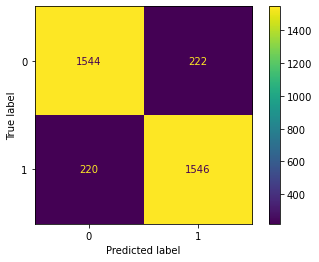

In [69]:
plot_confusion_matrix(lr, X_test_q,y_test_sm)

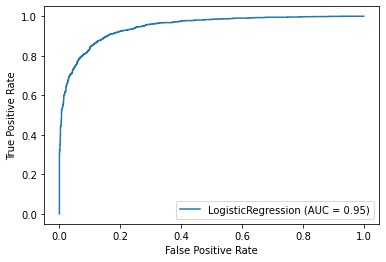

In [70]:
plot_roc_curve(lr, X_test_q,y_test_sm)

### Evaluation Using Cross-Validation

In [71]:
def get_cv_score(lr, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(lr,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(lr,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(lr,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(lr,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [72]:
cv_merics_lr = get_cv_score(lr, X_train_q, y_train_sm, cv=5)

Cross Validaion accuracy Scores: [0.81791045 0.80179104 0.90083632 0.92413381 0.91218638]
Cross Validation accuracy Mean Score: 0.8713716007774746
Cross Validaion precision Scores: [0.86438356 0.84848485 0.88518944 0.88586957 0.86780384]
Cross Validation precision Mean Score: 0.8703462501454823
Cross Validaion recall Scores: [0.75388292 0.73508353 0.92114695 0.97371565 0.97252091]
Cross Validation recall Mean Score: 0.8712699919875222
Cross Validaion f1 Scores: [0.80536056 0.78772379 0.9028103  0.9277177  0.9171831 ]
Cross Validation f1 Mean Score: 0.8681590900832294


In [73]:
cv_merics_lr

,Accuracy,Precision,Recall,f1
0,0.871372,0.870346,0.87127,0.87127


In [74]:
#Predict on the test data
p1 = lr.predict(X_test_q)

In [75]:
pd.DataFrame({'y_pred':lr_pred,'P1':p1})

,y_pred,P1
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
3527,1,1
3528,1,1
3529,1,1
3530,1,1


In [76]:
print(f'Train Accuracy - : {lr.score(X_train_q,y_train_sm):.3f}')
print(f'Test Accuracy - : {lr.score(X_test_q,y_test_sm):.3f}')

Train Accuracy - : 0.876
Test Accuracy - : 0.875


### Decision Tree

In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier() 

In [78]:
y_train_sm = y_train_sm.astype(np.number)
dt.fit(X_train_q,y_train_sm)

DecisionTreeClassifier()

In [79]:
dt_pred = dt.predict(X_test_q)
dt_pred[0:5]

array([0., 1., 0., 0., 0.])

In [80]:
dt_pred = dt_pred.astype(np.number)
y_test_sm = y_test_sm.astype(np.number)

In [81]:
dt_acc_score = metrics.accuracy_score(y_test_sm, dt_pred)
dt_acc_score

0.8190826727066818

In [82]:
print(confusion_matrix(y_test_sm, dt_pred))
print(classification_report(y_test_sm, dt_pred))

[[1467  299]
 [ 340 1426]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1766
         1.0       0.83      0.81      0.82      1766

    accuracy                           0.82      3532
   macro avg       0.82      0.82      0.82      3532
weighted avg       0.82      0.82      0.82      3532



### Hyperparameter Tuning Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

param_dist = {'max_depth': [3,None],
              'max_features': sp_randint(1,11),
              'min_samples_split': sp_randint(2,11),
              'criterion': ['gini','entropy']}

random_search =  RandomizedSearchCV(dt, param_distributions = param_dist, cv = 5 )

random_search.fit(X_train_q, y_train_sm)

print("Best parameters:")
print(random_search.best_params_)

Best parameters:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 10}


In [84]:
dt_model = DecisionTreeClassifier(**random_search.best_params_)
dt_model.fit(X_train_q, y_train_sm)
dt_ypred = dt_model.predict(X_test_q)

In [85]:
dt_model_acc_score = metrics.accuracy_score(y_test_sm, dt_ypred)
dt_model_acc_score

0.8221970554926388

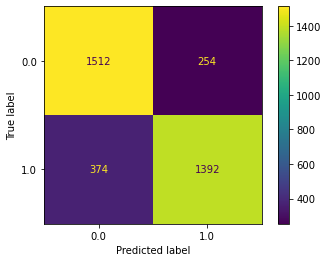

In [86]:
plot_confusion_matrix(dt_model, X_test_q,y_test_sm)

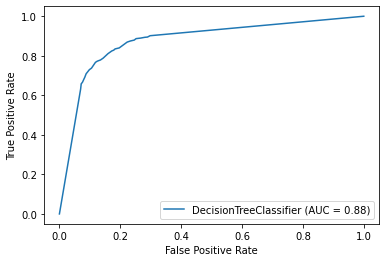

In [87]:
plot_roc_curve(dt_model, X_test_q,y_test_sm)

In [88]:
def get_cv_score(dt_model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(dt_model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(dt_model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(dt_model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(dt_model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics


In [89]:
cv_merics_dt = get_cv_score(dt_model, X_train_q, y_train_sm, cv=5)

Cross Validaion accuracy Scores: [0.75104478 0.76238806 0.8572282  0.89187575 0.88052569]
Cross Validation accuracy Mean Score: 0.828612493090105
Cross Validaion precision Scores: [0.80827586 0.82944606 0.8549346  0.85217391 0.8423913 ]
Cross Validation precision Mean Score: 0.8374443490529793
Cross Validaion recall Scores: [0.71326165 0.71360382 0.85902031 0.90681004 0.92473118]
Cross Validation recall Mean Score: 0.8234853993264956
Cross Validaion f1 Scores: [0.75080489 0.73464052 0.84924925 0.89674843 0.89555684]
Cross Validation f1 Mean Score: 0.8253999869986443


In [90]:
cv_merics_dt

,Accuracy,Precision,Recall,f1
0,0.828612,0.837444,0.823485,0.823485


In [91]:
#Predict on the test data
p1 = dt_model.predict(X_test_q)

pd.DataFrame({'y_pred':dt_ypred,'P1':p1})

,y_pred,P1
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3527,1.0,1.0
3528,1.0,1.0
3529,1.0,1.0
3530,1.0,1.0


In [92]:
print(f'Train Accuracy - : {dt_model.score(X_train_q,y_train_sm):.3f}')
print(f'Test Accuracy - : {dt_model.score(X_test_q,y_test_sm):.3f}')

Train Accuracy - : 0.927
Test Accuracy - : 0.822


### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_q,y_train_sm)

RandomForestClassifier()

In [94]:
rf_pred = rf.predict(X_test_q)

In [95]:
rf_acc_score = metrics.accuracy_score(y_test_sm, rf_pred)
rf_acc_score

0.855039637599094

In [96]:
print(confusion_matrix(y_test_sm, rf_pred))
print(classification_report(y_test_sm, rf_pred))

[[1541  225]
 [ 287 1479]]
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1766
         1.0       0.87      0.84      0.85      1766

    accuracy                           0.86      3532
   macro avg       0.86      0.86      0.85      3532
weighted avg       0.86      0.86      0.85      3532



### Hyperparameter Tuning Random Forest

In [97]:
param_dist = {'n_estimators': [100,150,250],
              'max_depth': [3,None],
              'max_features': sp_randint(1,11),
              'min_samples_split': sp_randint(2,11),
              'bootstrap' :[True,False],
              'criterion': ['gini','entropy']} 

In [98]:
random_search =  RandomizedSearchCV(rf, param_distributions = param_dist, cv = 5 )

random_search.fit(X_train_q, y_train_sm)

print("Best parameters:")
print(random_search.best_params_)

Best parameters:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 9, 'n_estimators': 250}


In [99]:
rf_model = RandomForestClassifier(**random_search.best_params_)
rf_model.fit(X_train_q, y_train_sm)
rf_ypred = rf_model.predict(X_test_q)

In [100]:
rf_model_acc_score = metrics.accuracy_score(y_test_sm, rf_ypred)
rf_model_acc_score

0.863533408833522

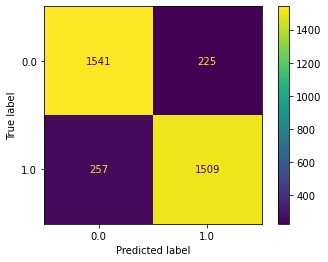

In [101]:
plot_confusion_matrix(rf_model, X_test_q,y_test_sm)

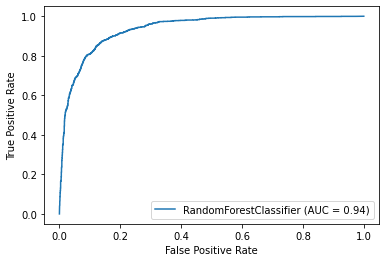

In [102]:
plot_roc_curve(rf_model, X_test_q,y_test_sm)

In [103]:
def get_cv_score(dt_model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(rf_model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(rf_model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(rf_model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(rf_model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [104]:
cv_merics_rf = get_cv_score(rf_model, X_train_q, y_train_sm, cv=5)

Cross Validaion accuracy Scores: [0.81253731 0.79641791 0.90083632 0.93727599 0.92771804]
Cross Validation accuracy Mean Score: 0.8749571140712209
Cross Validaion precision Scores: [0.85874126 0.83584131 0.89541716 0.89354839 0.87711864]
Cross Validation precision Mean Score: 0.8721333518924089
Cross Validaion recall Scores: [0.73596177 0.73389021 0.91158901 0.9916368  0.9916368 ]
Cross Validation recall Mean Score: 0.8729429175113985
Cross Validaion f1 Scores: [0.79564382 0.78039465 0.90112493 0.94057725 0.93093768]
Cross Validation f1 Mean Score: 0.8697356644366068


In [105]:
cv_merics_rf

,Accuracy,Precision,Recall,f1
0,0.874957,0.872133,0.872943,0.872943


In [106]:
#Predict on the test data
p1 = rf_model.predict(X_test_q)

pd.DataFrame({'y_pred':rf_ypred,'P1':p1})

,y_pred,P1
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3527,1.0,1.0
3528,1.0,1.0
3529,1.0,1.0
3530,1.0,1.0


In [107]:
print(f'Train Accuracy - : {rf_model.score(X_train_q,y_train_sm):.3f}')
print(f'Test Accuracy - : {rf_model.score(X_test_q,y_test_sm):.3f}')

Train Accuracy - : 0.970
Test Accuracy - : 0.864


### SVM

In [108]:
from sklearn.svm import SVC
svclassifier = SVC()

svclassifier.fit(X_train_q, y_train_sm)

SVC()

In [109]:
svc_pred = svclassifier.predict(X_test_q)

In [110]:
svc_acc_score = metrics.accuracy_score(y_test_sm, svc_pred)
svc_acc_score

0.8674971687429218

In [111]:
print(confusion_matrix(y_test_sm, svc_pred))
print(classification_report(y_test_sm, svc_pred))

[[1514  252]
 [ 216 1550]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1766
         1.0       0.86      0.88      0.87      1766

    accuracy                           0.87      3532
   macro avg       0.87      0.87      0.87      3532
weighted avg       0.87      0.87      0.87      3532



### Hyperparameter Tuning SVM

In [112]:
# defining parameter range
param_dist = {'C': [0.01, 0.1, 1], 
              'gamma': [0.1, 0.2, 0.3, 1],
              'kernel': ['linear','rbf']} 

In [113]:
random_search =  RandomizedSearchCV(svclassifier, param_distributions = param_dist, cv = 5 )

random_search.fit(X_train_q, y_train_sm)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'gamma': [0.1, 0.2, 0.3, 1],
                                        'kernel': ['linear', 'rbf']})

In [114]:
print("Best parameters:")
print(random_search.best_params_)

Best parameters:
{'kernel': 'linear', 'gamma': 1, 'C': 1}


In [115]:
svc_model = SVC(**random_search.best_params_)
svc_model.fit(X_train_q, y_train_sm)
svc_ypred = svc_model.predict(X_test_q)

In [116]:
svc_model_acc_score = metrics.accuracy_score(y_test_sm, svc_ypred)
svc_model_acc_score

0.8725934314835787

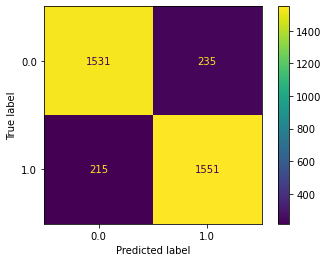

In [117]:
plot_confusion_matrix(svc_model, X_test_q,y_test_sm)

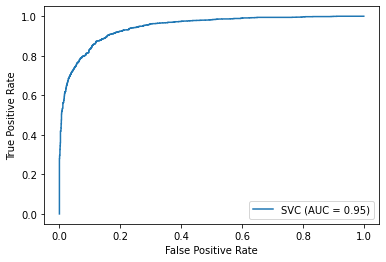

In [118]:
plot_roc_curve(svc_model, X_test_q,y_test_sm)

In [119]:
def get_cv_score(svc_model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(svc_model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(svc_model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(svc_model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(svc_model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [120]:
cv_merics_svm = get_cv_score(svc_model, X_train_q, y_train_sm, cv=5)

Cross Validaion accuracy Scores: [0.81134328 0.80597015 0.90143369 0.92054958 0.90860215]
Cross Validation accuracy Mean Score: 0.8695797713939264
Cross Validaion precision Scores: [0.86433566 0.84709066 0.88443936 0.87849462 0.86228814]
Cross Validation precision Mean Score: 0.867329689182144
Cross Validaion recall Scores: [0.73835125 0.74701671 0.92353644 0.97610514 0.97252091]
Cross Validation recall Mean Score: 0.8715060891979822
Cross Validaion f1 Scores: [0.79639175 0.79391249 0.90356517 0.92473118 0.91409321]
Cross Validation f1 Mean Score: 0.8665387600159684


In [121]:
cv_merics_svm

,Accuracy,Precision,Recall,f1
0,0.86958,0.86733,0.871506,0.871506


In [122]:
#Predict on the test data
p1 = svc_model.predict(X_test_q)

pd.DataFrame({'y_pred':svc_ypred,'P1':p1})

,y_pred,P1
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3527,1.0,1.0
3528,1.0,1.0
3529,1.0,1.0
3530,1.0,1.0


In [123]:
print(f'Train Accuracy - : {svc_model.score(X_train_q,y_train_sm):.3f}')
print(f'Test Accuracy - : {svc_model.score(X_test_q,y_test_sm):.3f}')

Train Accuracy - : 0.876
Test Accuracy - : 0.873


### Adaboost Classifier

In [124]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train_q, y_train_sm)

AdaBoostClassifier()

In [125]:
ada_pred = clf.predict(X_test_q)

In [126]:
ada_acc_score = metrics.accuracy_score(y_test_sm, ada_pred)
ada_acc_score

0.8680634201585504

In [127]:
print(confusion_matrix(y_test_sm, ada_pred))
print(classification_report(y_test_sm, ada_pred))

[[1521  245]
 [ 221 1545]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1766
         1.0       0.86      0.87      0.87      1766

    accuracy                           0.87      3532
   macro avg       0.87      0.87      0.87      3532
weighted avg       0.87      0.87      0.87      3532



### Hyperparameter Tuning Adaboost Classifier

In [128]:
# defining parameter range
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1],
              'algorithm': ['SAMME','SAMME.R']} 

In [129]:
random_search =  RandomizedSearchCV(clf, param_distributions = param_dist, cv = 5 )

random_search.fit(X_train_q, y_train_sm)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [50, 100, 200]})

In [130]:
print("Best parameters:")
print(random_search.best_params_)

Best parameters:
{'n_estimators': 200, 'learning_rate': 1, 'algorithm': 'SAMME'}


In [131]:
ada_model = AdaBoostClassifier(**random_search.best_params_)
ada_model.fit(X_train_q, y_train_sm)
ada_ypred = ada_model.predict(X_test_q)

In [132]:
ada_model_acc_score = metrics.accuracy_score(y_test_sm, ada_ypred)
ada_model_acc_score

0.8669309173272933

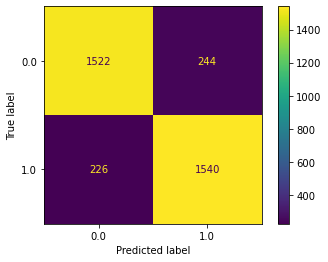

In [133]:
plot_confusion_matrix(ada_model, X_test_q,y_test_sm)

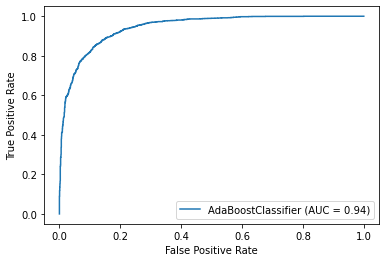

In [134]:
plot_roc_curve(ada_model, X_test_q,y_test_sm)

In [135]:
def get_cv_score(ada_model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(ada_model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(ada_model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(ada_model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(ada_model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [136]:
cv_merics_ada = get_cv_score(ada_model, X_train_q, y_train_sm, cv=5)

Cross Validaion accuracy Scores: [0.8238806  0.8041791  0.90860215 0.92054958 0.90681004]
Cross Validation accuracy Mean Score: 0.872804293942474
Cross Validaion precision Scores: [0.86424731 0.84090909 0.88863636 0.88095238 0.86731392]
Cross Validation precision Mean Score: 0.8684118126366795
Cross Validaion recall Scores: [0.76821983 0.75059666 0.93428913 0.97252091 0.96057348]
Cross Validation recall Mean Score: 0.8772400007983963
Cross Validaion f1 Scores: [0.81340923 0.79319042 0.91089109 0.92447473 0.91156463]
Cross Validation f1 Mean Score: 0.8707060192057974


In [137]:
cv_merics_ada

,Accuracy,Precision,Recall,f1
0,0.872804,0.868412,0.87724,0.87724


In [138]:
#Predict on the test data
p1 = ada_model.predict(X_test_q)
pd.DataFrame({'y_pred':ada_ypred,'P1':p1})

,y_pred,P1
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3527,1.0,1.0
3528,1.0,1.0
3529,1.0,1.0
3530,1.0,1.0


In [139]:
print(f'Train Accuracy - : {ada_model.score(X_train_q,y_train_sm):.3f}')
print(f'Test Accuracy - : {ada_model.score(X_test_q,y_test_sm):.3f}')

Train Accuracy - : 0.879
Test Accuracy - : 0.867


###  XG Boost Classifier

In [140]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic',eval_metric=['logloss']) 
xgb.fit(X_train_q, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [141]:
xgb_pred = xgb.predict(X_test_q)

In [142]:
xgb_acc_score = metrics.accuracy_score(y_test_sm, xgb_pred)
xgb_acc_score

0.8748584371460929

In [143]:
print(confusion_matrix(y_test_sm, xgb_pred))
print(classification_report(y_test_sm, xgb_pred))

[[1552  214]
 [ 228 1538]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      1766
         1.0       0.88      0.87      0.87      1766

    accuracy                           0.87      3532
   macro avg       0.87      0.87      0.87      3532
weighted avg       0.87      0.87      0.87      3532



In [144]:
# defining parameter range
param_dist = {'n_estimators': [50, 100, 300],
              'learning_rate': [0.01, 0.1, 1],
              'eval_metric': ['logloss','error'],
              'max_depth': [4, 6]} 

In [145]:
random_search =  RandomizedSearchCV(xgb, param_distributions = param_dist, cv = 5 )

random_search.fit(X_train_q, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric=['logloss'], gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1, random_state=0,
                                         

In [146]:
print("Best parameters:")
print(random_search.best_params_)

Best parameters:
{'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1, 'eval_metric': 'logloss'}


In [147]:
xgb_model = XGBClassifier(**random_search.best_params_)
xgb_model.fit(X_train_q, y_train_sm)
xgb_ypred = xgb_model.predict(X_test_q)

In [148]:
xgb_model_acc_score = metrics.accuracy_score(y_test_sm, xgb_ypred)
xgb_model_acc_score

0.8694790486976217

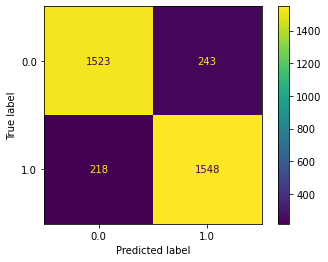

In [149]:
plot_confusion_matrix(xgb_model, X_test_q,y_test_sm)

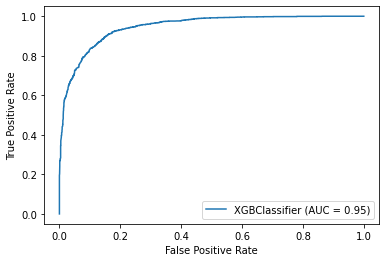

In [150]:
plot_roc_curve(xgb_model, X_test_q,y_test_sm)

In [151]:
def get_cv_score(xgb_model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(xgb_model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(xgb_model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(xgb_model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(xgb_model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [152]:
cv_merics_xgb = get_cv_score(xgb_model, X_train_q, y_train_sm, cv=5)

Cross Validaion accuracy Scores: [0.82865672 0.82985075 0.90561529 0.92353644 0.90621266]
Cross Validation accuracy Mean Score: 0.8787743718682574
Cross Validaion precision Scores: [0.85529716 0.84519351 0.88711517 0.88407367 0.8640257 ]
Cross Validation precision Mean Score: 0.8671410399623027
Cross Validaion recall Scores: [0.79091995 0.80787589 0.92951016 0.97491039 0.96415771]
Cross Validation recall Mean Score: 0.8934748205746743
Cross Validaion f1 Scores: [0.82184978 0.82611348 0.90781797 0.92727273 0.91134952]
Cross Validation f1 Mean Score: 0.8788806967109505


In [153]:
cv_merics_xgb

,Accuracy,Precision,Recall,f1
0,0.878774,0.867141,0.893475,0.893475


In [154]:
#Predict on the test data
p1 = xgb_model.predict(X_test_q)

pd.DataFrame({'y_pred':xgb_ypred,'P1':p1})

,y_pred,P1
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3527,1.0,1.0
3528,1.0,1.0
3529,1.0,1.0
3530,1.0,1.0


In [155]:
print(f'Train Accuracy : {xgb_model.score(X_train_q,y_train_sm):.3f}')
print(f'Test Accuracy : {xgb_model.score(X_test_q,y_test_sm):.3f}')

Train Accuracy : 0.885
Test Accuracy : 0.869


### Evaluation

In [156]:
from sklearn import metrics

In [157]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree',
                         'Random Forest','SVM','Adaboost Classifier','XGBoost Classifier'],
                         'Accuracy': [lr_acc_score, dt_model_acc_score, rf_model_acc_score, svc_model_acc_score, ada_model_acc_score,
                                              xgb_model_acc_score]}) 
model_ev

,Model,Accuracy
0,Logistic Regression,0.874858
1,Decision Tree,0.822197
2,Random Forest,0.863533
3,SVM,0.872593
4,Adaboost Classifier,0.866931
5,XGBoost Classifier,0.869479


### Conclusion:
#### Logistic Regression gives highest accuracy among all models i.e. 87.4%